In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [5]:
df = pd.read_csv("loan_data.csv")
print(df.head())
print(df.info())


                                                Text  Income  Credit_Score  \
0  I need a loan to pay for an international vaca...   26556           581   
1  I want to make home improvements like installi...  197392           389   
2  I need a loan for home renovation, including a...   44561           523   
3  I need funds to buy new furniture and applianc...  190363           729   
4           I need a loan to start a small business.   61853           732   

   Loan_Amount  DTI_Ratio Employment_Status  Approval  
0         8314      79.26          employed  Rejected  
1       111604      22.14          employed  Rejected  
2        34118      45.44          employed  Rejected  
3       118757      10.22        unemployed  Rejected  
4        19210      44.13          employed  Approved  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             -------------- 

In [6]:
print(df.isnull().sum())
df = df.dropna()   # simple option


Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64


In [7]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])


In [11]:
X = df.drop('Approval', axis=1)  # Features
y = df['Approval']               # Target (Approved/Not Approved)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print(df.columns)


Index(['Text', 'Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio',
       'Employment_Status', 'Approval'],
      dtype='object')


In [12]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Approval
1    16020
0     3180
Name: count, dtype: int64
After SMOTE: Approval
1    16020
0    16020
Name: count, dtype: int64


In [13]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res, y_train_res)
y_pred_log = log_reg.predict(X_test)


In [14]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)


In [15]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77       753
           1       0.99      0.91      0.95      4047

    accuracy                           0.91      4800
   macro avg       0.82      0.92      0.86      4800
weighted avg       0.93      0.91      0.92      4800

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       753
           1       1.00      1.00      1.00      4047

    accuracy                           1.00      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       1.00      1.00      1.00      4800



In [16]:
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Logistic Regression Confusion Matrix:
 [[ 707   46]
 [ 379 3668]]
Decision Tree Confusion Matrix:
 [[ 744    9]
 [  11 4036]]


In [17]:
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,14,26556,581,8314,79.26,0,1
1,64,197392,389,111604,22.14,0,1
2,0,44561,523,34118,45.44,0,1
3,35,190363,729,118757,10.22,1,1
4,20,61853,732,19210,44.13,0,0


In [21]:
# Example with Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)  

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 585  168]
 [ 173 3874]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       753
           1       0.96      0.96      0.96      4047

    accuracy                           0.93      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.93      0.93      0.93      4800



In [24]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9289583333333333


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.78      0.77       753
           1       0.96      0.96      0.96      4047

    accuracy                           0.93      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.93      0.93      0.93      4800



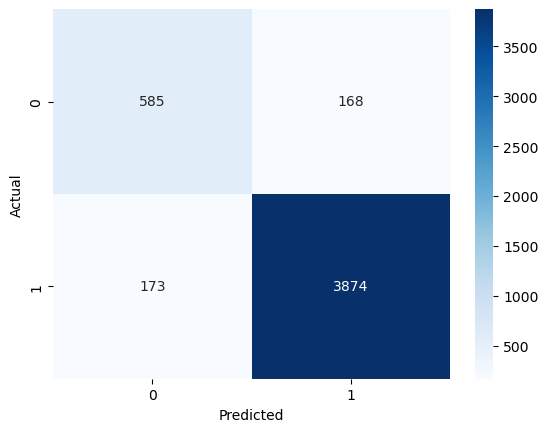

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, log_pred))

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

print("Decision Tree Report:")
print(classification_report(y_test, tree_pred))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       753
           1       0.96      0.96      0.96      4047

    accuracy                           0.93      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.93      0.93      0.93      4800

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       753
           1       1.00      1.00      1.00      4047

    accuracy                           1.00      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       1.00      1.00      1.00      4800



In [32]:
print(X.dtypes)


Text                  object
Income                 int64
Credit_Score           int64
Loan_Amount            int64
DTI_Ratio            float64
Employment_Status     object
dtype: object


In [34]:
# Separate features and target
X = df.drop("Approval", axis=1)  
y = df["Approval"]                # Target variable

# One-hot encode all categorical variables automatically
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)


Shape after encoding: (24000, 6)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Training done ✅")


Training done ✅


In [36]:

sample = X.iloc[0].values.reshape(1, -1)
print("Prediction:", model.predict(sample))


Prediction: [1]


C:\Users\aaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


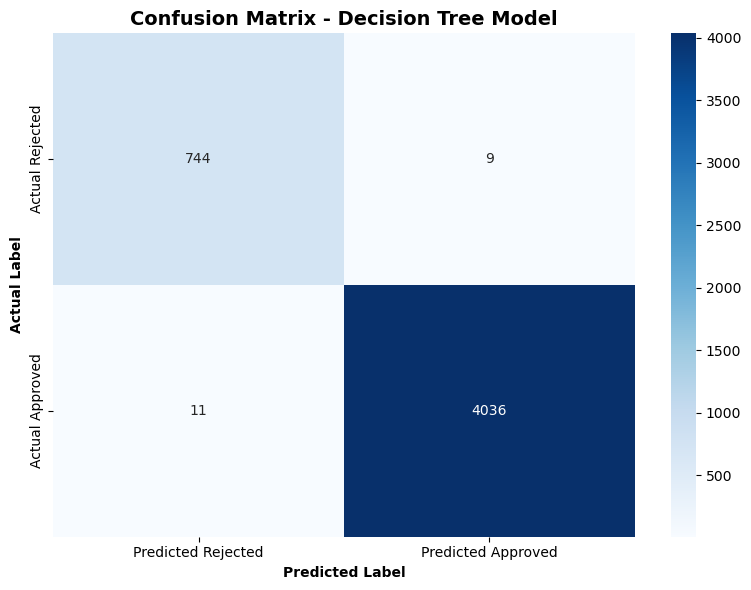

In [37]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Your model's results
y_true = [0]*753 + [1]*4047 # Actual values: 753 Rejected, 4047 Approved
y_pred = [0]*744 + [1]*9 + [0]*11 + [1]*4036 # Predictions from the confusion matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a beautiful visual plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Rejected', 'Predicted Approved'],
            yticklabels=['Actual Rejected', 'Actual Approved'])
plt.title('Confusion Matrix - Decision Tree Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontweight='bold')
plt.xlabel('Predicted Label', fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight') # Save as high-resolution image
plt.show()

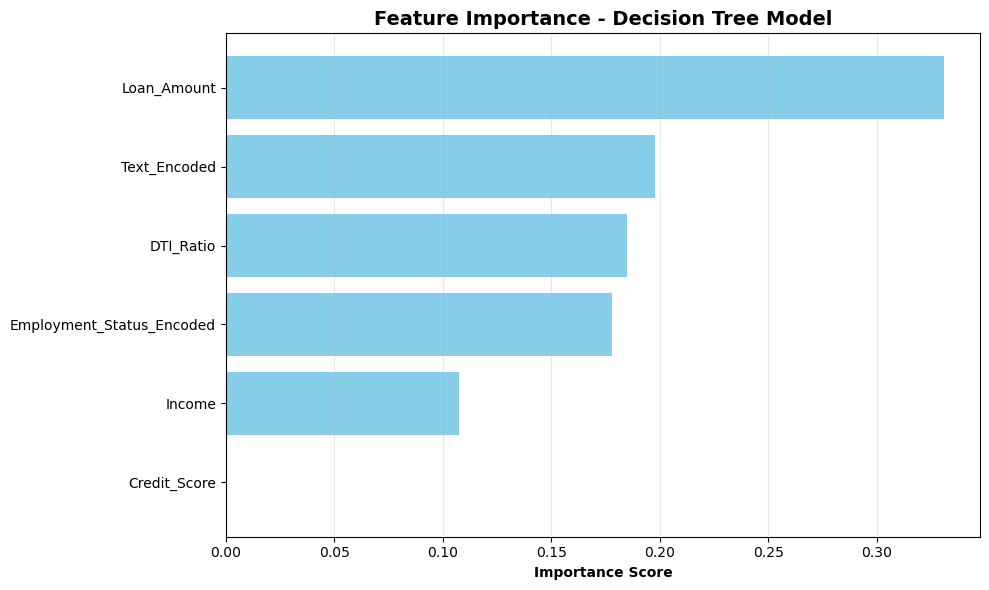

In [38]:
# Get feature importances from your trained model
feature_importance = model.feature_importances_

# Create feature names (adjust based on your actual feature names after encoding)
# These should match the order of features in your training data
feature_names = ['Credit_Score', 'Income', 'Loan_Amount', 'DTI_Ratio', 
                 'Employment_Status_Encoded', 'Text_Encoded']  # Update with your actual feature names

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=True)

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score', fontweight='bold')
plt.title('Feature Importance - Decision Tree Model', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight') # Save as high-resolution image
plt.show()